---
### Orienteering Problem
---

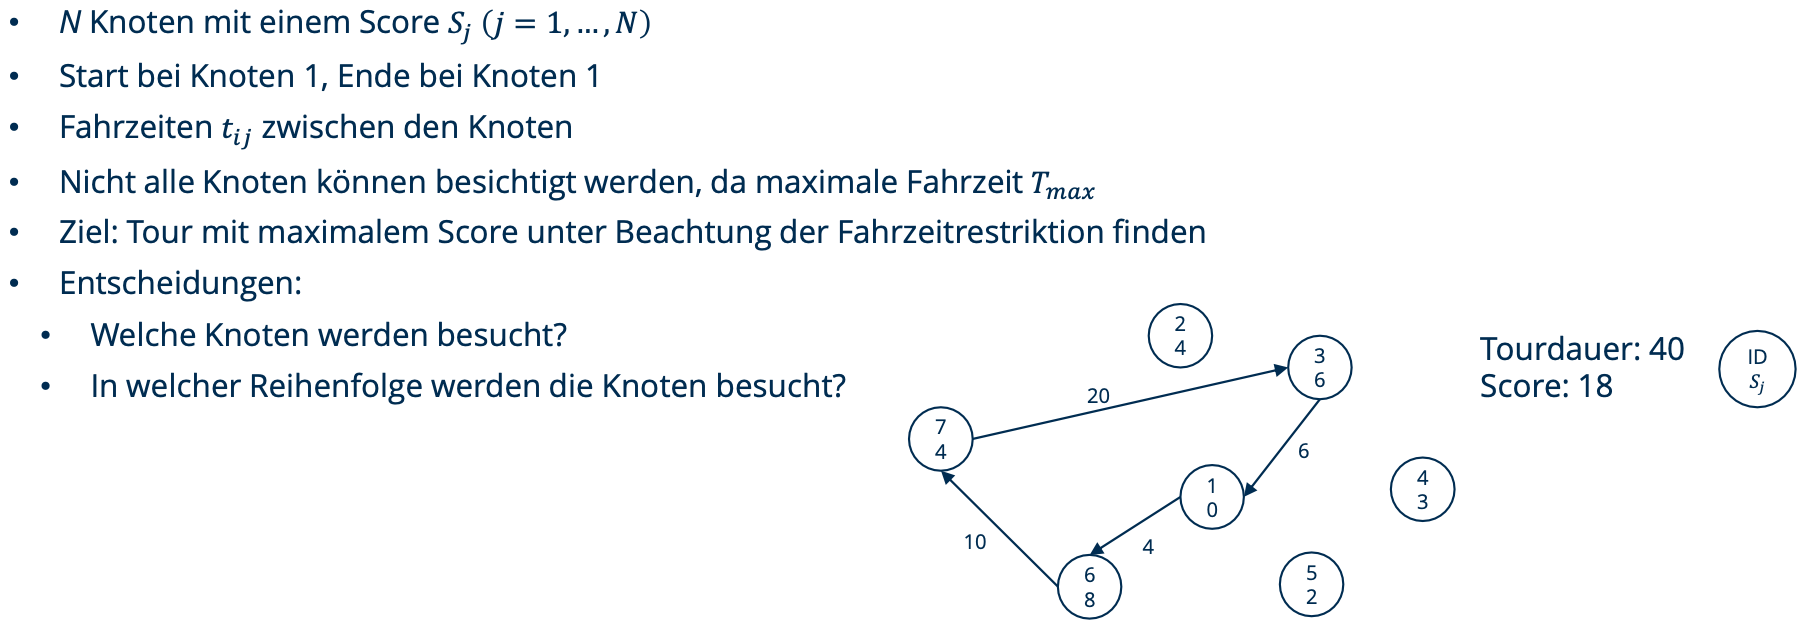
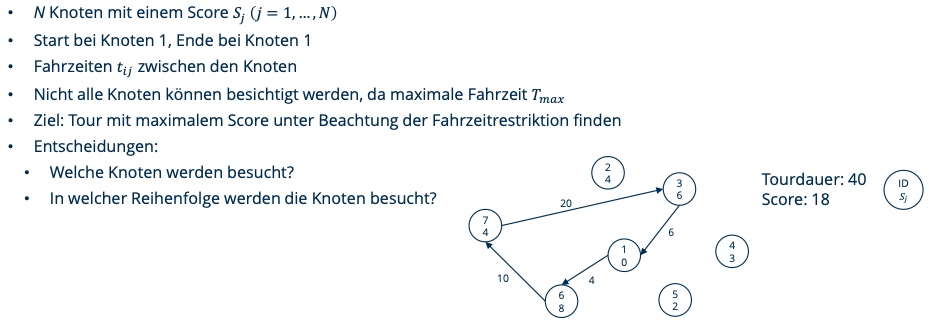

---
### Variable Neighborhood Search
---

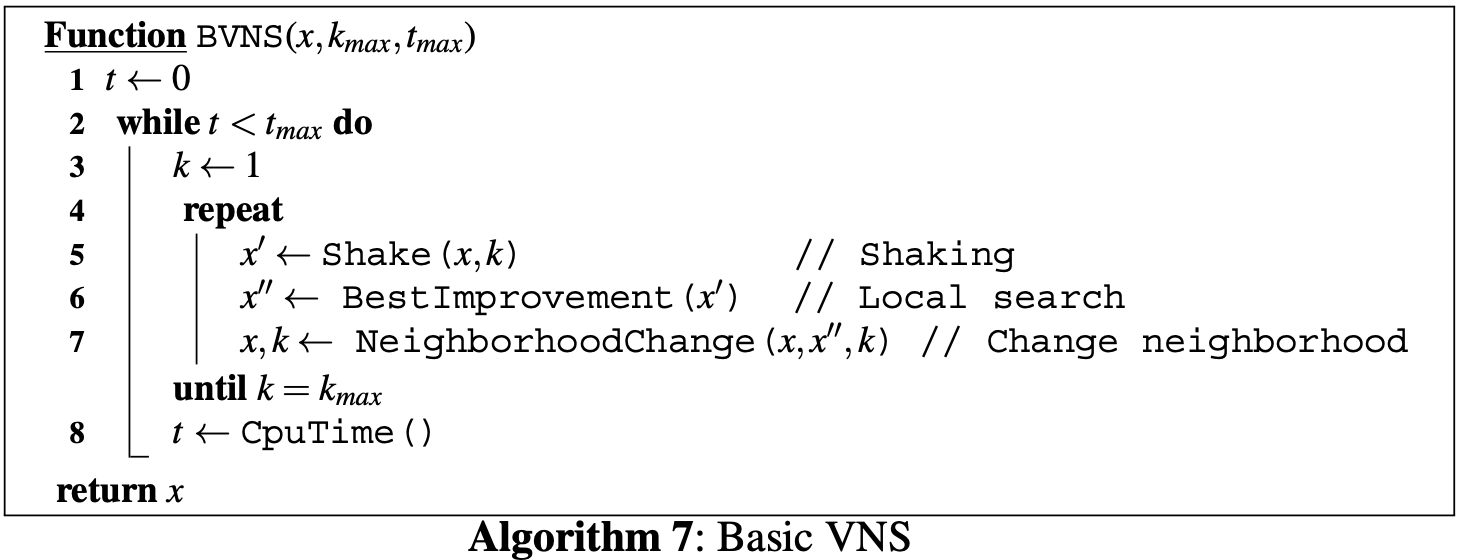

In [6]:
import numpy
from Solver import *
from copy import deepcopy
from ImprovementAlgorithm import *
from Neighborhood import *
import time
import random

---
### Input Data
---

In [7]:
data = InputData("Testinstanzen/Instance_2.json")
for node in data.InputNodes:
    print(node.Times)

[0.0, 44.384682042344295, 52.03844732503075, 74.21590126111789, 34.92849839314596, 29.154759474226502, 13.152946437965905, 50.44799302251776, 49.92995093127971, 32.89376840679705, 18.788294228055936, 13.601470508735444, 12.36931687685298, 24.698178070456937, 109.83624174196785, 118.6001686339442, 92.63368717696602, 106.06601717798213, 126.84636376341263, 97.0051545022222]
[44.384682042344295, 0.0, 15.811388300841896, 41.012193308819754, 27.313000567495326, 27.202941017470888, 32.69556544854363, 21.37755832643195, 34.88552708502482, 37.73592452822641, 35.510561809129406, 32.14031735997639, 46.010868281309364, 56.88585061331157, 82.76472678623425, 88.54377448471462, 59.23681287847955, 64.03124237432849, 83.18653737234169, 54.91812087098393]
[52.03844732503075, 15.811388300841896, 0.0, 25.612496949731394, 23.323807579381203, 26.570660511172846, 39.0, 36.40054944640259, 50.60632371551998, 52.630789467763066, 47.92702786528704, 42.20189569201838, 56.753854494650845, 68.9492567037528, 94.339

---
### Output Data
---

In [8]:
#wird dann für die Präsentation noch gemacht...

---
### Evaluation Logic
---

---
### Constructive Heuristic
---

---
### Neighborhood
---

In [9]:
data = InputData("Testinstanzen/Instance_5.json")
solver = Solver(data, 2048)
Evaluator = EvaluationLogic(data)
startSolution = solver.ConstructionPhase("HSF")
NBH = AddNeighborhood(data, startSolution.Sequence, Evaluator, SolutionPool())
NBH2 = ReNeighborhood(data, startSolution.Sequence, Evaluator, SolutionPool())
NBH3 = ExchangeNeighborhood(data, startSolution.Sequence, Evaluator, SolutionPool())
print(NBH3.Sequence)
print("leerzeile")
#print(NBH2.Residue)
NBH3.DiscoverMoves()
NBH3.EvaluateMoves("BestImprovement")
for move in NBH3.Moves:
    print(move.Sequence)

Generating an initial solution according to HSF.
Constructive solution found.
Sequence [1, 87, 26, 126, 65, 4, 104, 60, 116, 40, 85, 53, 1] collects 869 score points in 12952.814204302615 time units
[87, 26, 126, 65, 4, 104, 60, 116, 40, 85, 53]
leerzeile
[2, 26, 126, 65, 4, 104, 60, 116, 40, 85, 53]
[87, 2, 126, 65, 4, 104, 60, 116, 40, 85, 53]
[87, 26, 2, 65, 4, 104, 60, 116, 40, 85, 53]
[87, 26, 126, 2, 4, 104, 60, 116, 40, 85, 53]
[87, 26, 126, 65, 2, 104, 60, 116, 40, 85, 53]
[87, 26, 126, 65, 4, 2, 60, 116, 40, 85, 53]
[87, 26, 126, 65, 4, 104, 2, 116, 40, 85, 53]
[87, 26, 126, 65, 4, 104, 60, 2, 40, 85, 53]
[87, 26, 126, 65, 4, 104, 60, 116, 2, 85, 53]
[87, 26, 126, 65, 4, 104, 60, 116, 40, 2, 53]
[87, 26, 126, 65, 4, 104, 60, 116, 40, 85, 2]
[3, 26, 126, 65, 4, 104, 60, 116, 40, 85, 53]
[87, 3, 126, 65, 4, 104, 60, 116, 40, 85, 53]
[87, 26, 3, 65, 4, 104, 60, 116, 40, 85, 53]
[87, 26, 126, 3, 4, 104, 60, 116, 40, 85, 53]
[87, 26, 126, 65, 3, 104, 60, 116, 40, 85, 53]
[87, 26, 1

---
### Solver
---

---
### Improvement Algorithm
---

---
### Results
---

In [10]:
data = InputData("Testinstanzen/Instance_1.json")
vns = VariableNeighborhoodSearch(data, 999999999)
#vns.NeighborhoodEvaluationStrategy = "FirstImprovement"

solver = Solver(data, 2048)
#print(solver.ConstructionPhase("HSF"))
solver.RunLocalSearch(constructiveSolutionMethod = "", algorithm = vns)
solver.WriteSolution()

Generating an initial solution according to .
Unkown constructive solution method: .


AttributeError: 'NoneType' object has no attribute 'TotalTime'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

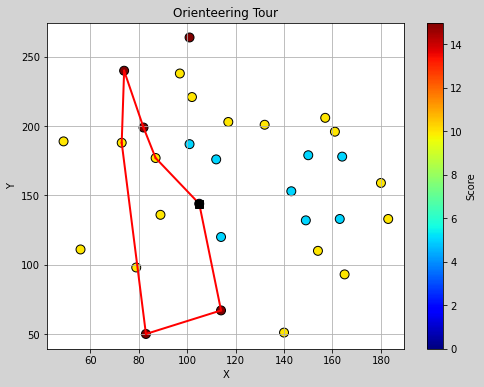

In [ ]:
with open(str(data.Path)) as file:
    data = json.load(file)

x = [node['X'] for node in data['Nodes']]
y = [node['Y'] for node in data['Nodes']]
scores = [node['Score'] for node in data['Nodes']]

# Farbpalette
colormap = cm.get_cmap('jet')

plt.figure(figsize=(8, 6), facecolor='lightgray')
sc = plt.scatter(x, y, c=scores, cmap=colormap, edgecolor='black', s=80)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Orienteering Tour')

# colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Score')

# Ids fü der Tour
node_ids = [1] + solver.SolutionPool.GetHighestTotalScoreSolution().Sequence + [1]

# Plot der Verbindungen
for i in range(len(node_ids) - 1):
    start_node = data['Nodes'][node_ids[i] - 1]
    end_node = data['Nodes'][node_ids[i + 1] - 1]
    plt.plot([start_node['X'], end_node['X']], [start_node['Y'], end_node['Y']], 'r-', linewidth=2)

# Plot von letztem zum ersten Knoten
start_node = data['Nodes'][node_ids[-1] - 1]
end_node = data['Nodes'][node_ids[0] - 1]
plt.plot([start_node['X'], end_node['X']], [start_node['Y'], end_node['Y']], 'r-', linewidth=2)

# Startknoten als Viereck
for i, score in enumerate(scores):
    if score == 0:
        plt.plot(x[i], y[i], 's', color='black', markersize=8)

plt.grid(True)
plt.show()